In [13]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import snowflake.connector
import pandas as pd

# Function to load Google Gemini model and provide query as response

# Function to retrieve query from Snowflake database and return as a Pandas DataFrame
def read_snowflake_query(sql):
    # Establish connection to Snowflake
    conn = snowflake.connector.connect(
        user='your_username',
        password='your_password',
        account='your_accountname',
        warehouse='your_warehouse',
        database='your_database',
        schema='you_schema'
    )
    # Execute the query and fetch all results
    df = pd.read_sql(sql, conn)
    
    # Close the connection
    conn.close()

    return df

# Example usage:
sql = "SELECT * FROM your_table;"
df = read_snowflake_query(sql)

def standardize_stops(stops):
    if pd.isna(stops):
        return -1
    stops = stops.lower()
    if 'non-stop' in stops:
        return 0
    elif '1-stop' in stops:
        return 1
    elif '2+' in stops:
        return 2
    else:
        return 1  # For other complex cases

df['Total_Stops_Clean'] = df['Total Stops'].apply(standardize_stops)

df = df.dropna(subset=['Duration_in_mins', 'Total_Stops_Clean'])

# Replace null values with '-1'
df['Price'].fillna('-1', inplace=True)

# Fill the '-1' values with the median value of the Price column
median_price = df[df['Price'] != -1]['Price'].median()
df.loc[df['Price'] == -1, 'Price'] = median_price

# # Fill missing values in the Price column with the median value
# df['Price'].fillna(df['Price'].median(), inplace=True)

# # Calculate the correlation matrix
# correlation_matrix = df[['Duration_in_mins', 'Total_Stops_Clean', 'Price']].corr()

# # Plot the heatmap
# plt.figure(figsize=(8, 6))
# sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
# plt.title('Correlation Heatmap between Duration in Minutes, Total Stops, and Price')
# plt.show()


/tmp/ipykernel_1092784/884561289.py:27: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Price'].fillna('-1', inplace=True)
/tmp/ipykernel_1092784/884561289.py:27: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '-1' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df['Price'].fillna('-1', inplace=True)


TypeError: Cannot convert [8895.0 8895.0 8895.0 ... 6862.0 81521.0 14172.0] to numeric

In [11]:
df.sample(20)

,StandardDateofBooking,StandardDateofJourney,Month_of_Journey,Airline_Company,Flight_Number,Flight_Class,Departure_Time,Departure_City,Arrival_Time,Arrival_City,Duration_in_mins,Total Stops,Price,Total_Stops_Clean
257528,2023-01-15,2023-10-02,10,GO FIRST,G8- 317,ECONOMY,05:45,Mumbai,07:20,Bangalore,95.0,non-stop,2252.0,0
391905,2023-01-15,2023-02-19,2,Vistara,UK-830,PREMIUMECONOMY,10:10,Hyderabad,22:55,Ahmedabad,765.0,1-stop,11269.0,1
414928,2023-01-15,2023-01-23,1,Vistara,UK-832,ECONOMY,07:05,Chennai,19:55,Mumbai,770.0,2+-stop,16333.0,2
240088,2023-01-15,2023-01-25,1,SpiceJet,SG- 194,ECONOMY,06:10,Ahmedabad,22:50,Kolkata,1000.0,1-stop,11237.0,1
57327,2023-01-15,2023-02-02,2,Vistara,UK-994,ECONOMY,10:20,Mumbai,15:00,Ahmedabad,280.0,1-stop,9665.0,1
447518,2023-01-15,2023-02-26,2,Indigo,6E- 834,ECONOMY,10:15,Chennai,16:40,Kolkata,385.0,1-stop,5203.0,1
295323,2023-01-15,2023-05-02,5,Air India,AI-660,ECONOMY,18:00,Mumbai,14:45,Chennai,1245.0,1-stop,11571.0,1
126397,2023-01-15,2023-02-21,2,Vistara,UK-706,PREMIUMECONOMY,10:15,Kolkata,20:25,Bangalore,610.0,1-stop,13471.0,1
25497,2023-01-15,2023-01-25,1,Vistara,UK-829,ECONOMY,07:20,Delhi,16:40,Ahmedabad,560.0,2+-stop,20654.0,2
310797,2023-01-15,2023-01-18,1,Air India,AI-604,ECONOMY,09:15,Bangalore,NaN,NaN,825.0,1-stop,11748.0,1


In [15]:
import pandas as pd

df = pd.read_csv('part-merged_1.csv')

# Handling missing values in the 'Price' column
df['Price'].fillna(-1, inplace=True)  # Replace null values with -1
df['Price'] = df['Price'].astype(int)  # Convert to integer
median_price = df[df['Price'] != -1]['Price'].median()  # Calculate median value excluding -1
df.loc[df['Price'] == -1, 'Price'] = median_price  # Replace -1 with median value


# Check for any remaining missing values
print(df.isnull().sum())


StandardDateofBooking       0
StandardDateofJourney       0
Month_of_Journey            0
Airline_Company          9171
Flight_Number            9171
Flight_Class             9171
Departure_Time           9165
Departure_City           9165
Arrival_Time             9159
Arrival_City             9159
Duration_in_mins         9150
Total Stops              9179
Price                       0
dtype: int64


/tmp/ipykernel_1092784/2810173558.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Price'].fillna(-1, inplace=True)  # Replace null values with -1


In [16]:
def standardize_stops(stops):
    if pd.isna(stops):
        return -1
    stops = stops.lower()
    if 'non-stop' in stops:
        return 0
    elif '1-stop' in stops:
        return 1
    elif '2+' in stops:
        return 2
    else:
        return 1  # For other complex cases

df['Total_Stops_Clean'] = df['Total Stops'].apply(standardize_stops)

df = df.dropna(subset=['Duration_in_mins', 'Total_Stops_Clean'])

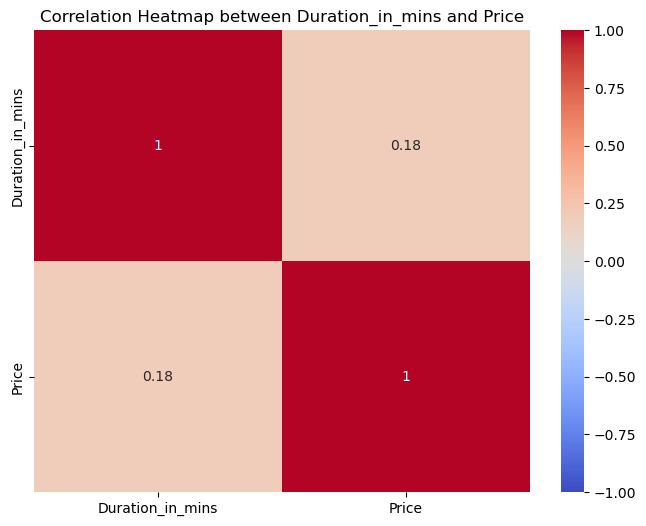

In [19]:
# Calculate the correlation matrix
correlation_matrix = df[['Duration_in_mins', 'Price']].corr()

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap between Duration_in_mins and Price')
plt.show()

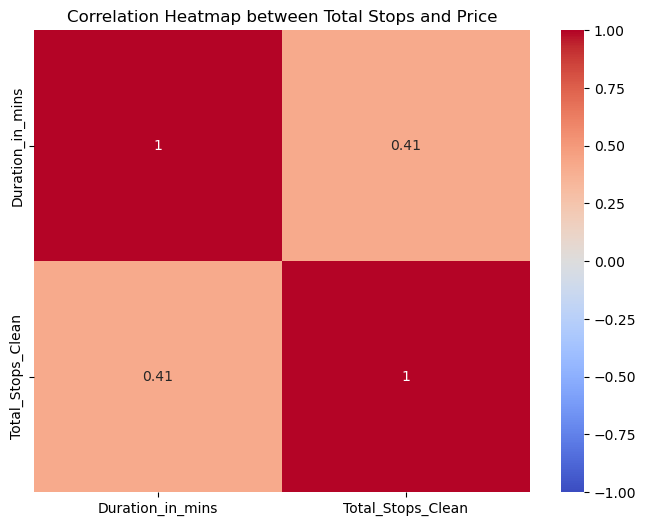

In [20]:
# Calculate the correlation matrix
correlation_matrix = df[['Duration_in_mins', 'Total_Stops_Clean']].corr()

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap between Total Stops and Price')
plt.show()

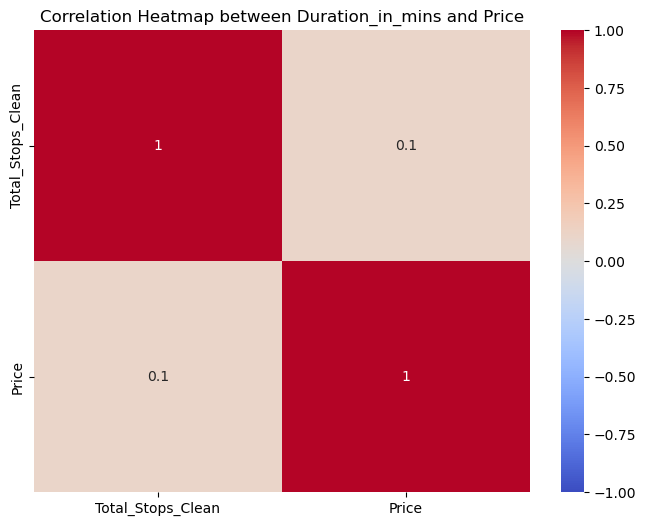

In [21]:
# Calculate the correlation matrix
correlation_matrix = df[['Total_Stops_Clean', 'Price']].corr()

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap between Duration_in_mins and Price')
plt.show()

In [24]:
df.isnull().sum()

StandardDateofBooking       0
StandardDateofJourney       0
Month_of_Journey            0
Airline_Company          8991
Flight_Number            8991
Flight_Class             8991
Departure_Time           8961
Departure_City           8961
Arrival_Time             8977
Arrival_City             8977
Duration_in_mins            0
Total Stops              9012
Price                       0
Total_Stops_Clean           0
dtype: int64

# <---------------------------------------------------------------------------------------------------------->

In [25]:
# Another Approach

df = pd.read_csv('part-merged_1.csv')

In [26]:
def standardize_stops(stops):
    if pd.isna(stops):
        return -1
    stops = stops.lower()
    if 'non-stop' in stops:
        return 0
    elif '1-stop' in stops:
        return 1
    elif '2+' in stops:
        return 2
    else:
        return 1  # For other complex cases

df['Total_Stops_Clean'] = df['Total Stops'].apply(standardize_stops)


In [27]:
df.head()

,StandardDateofBooking,StandardDateofJourney,Month_of_Journey,Airline_Company,Flight_Number,Flight_Class,Departure_Time,Departure_City,Arrival_Time,Arrival_City,Duration_in_mins,Total Stops,Price,Total_Stops_Clean
0,2023-01-15,2023-06-03,6,Air India,AI-624,ECONOMY,19:00,Delhi,07:25,Hyderabad,745.0,1-stop,8895.0,1
1,2023-01-15,2023-06-03,6,Air India,AI-678,ECONOMY,09:00,Delhi,21:40,Hyderabad,760.0,NaN,8895.0,-1
2,2023-01-15,2023-03-06,3,Air India,AI-441,ECONOMY,17:50,Delhi,07:25,Hyderabad,815.0,NaN,8895.0,-1
3,2023-01-15,2023-06-03,6,Air India,AI-665,ECONOMY,08:00,Delhi,21:40,Hyderabad,820.0,1-stop,8895.0,1
4,2023-01-15,2023-06-03,6,Air India,AI-814,ECONOMY,22:30,Delhi,12:25,Hyderabad,835.0,1-stop,8895.0,1


In [28]:
df['Price'].fillna(-1, inplace=True)  # Replace null values with -1
df['Price'] = df['Price'].astype(int)  # Convert to integer
median_price = df[df['Price'] != -1]['Price'].median()  # Calculate median value excluding -1
df.loc[df['Price'] == -1, 'Price'] = median_price  # Replace -1 with median value

/tmp/ipykernel_1092784/3283066013.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Price'].fillna(-1, inplace=True)  # Replace null values with -1


In [32]:
df.head()

,StandardDateofBooking,StandardDateofJourney,Month_of_Journey,Airline_Company,Flight_Number,Flight_Class,Departure_Time,Departure_City,Arrival_Time,Arrival_City,Duration_in_mins,Total Stops,Price,Total_Stops_Clean
0,2023-01-15,2023-06-03,6,Air India,AI-624,ECONOMY,19:00,Delhi,07:25,Hyderabad,745.0,1-stop,8895,1
1,2023-01-15,2023-06-03,6,Air India,AI-678,ECONOMY,09:00,Delhi,21:40,Hyderabad,760.0,NaN,8895,-1
2,2023-01-15,2023-03-06,3,Air India,AI-441,ECONOMY,17:50,Delhi,07:25,Hyderabad,815.0,NaN,8895,-1
3,2023-01-15,2023-06-03,6,Air India,AI-665,ECONOMY,08:00,Delhi,21:40,Hyderabad,820.0,1-stop,8895,1
4,2023-01-15,2023-06-03,6,Air India,AI-814,ECONOMY,22:30,Delhi,12:25,Hyderabad,835.0,1-stop,8895,1


In [33]:
df1= pd.read_csv('modified_flight_data_2.csv')

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 458869 entries, 0 to 458868
Data columns (total 14 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   StandardDateofBooking  458869 non-null  object 
 1   StandardDateofJourney  458869 non-null  object 
 2   Month_of_Journey       458869 non-null  int64  
 3   Airline_Company        449698 non-null  object 
 4   Flight_Number          449698 non-null  object 
 5   Flight_Class           449698 non-null  object 
 6   Departure_Time         449704 non-null  object 
 7   Departure_City         449704 non-null  object 
 8   Arrival_Time           449710 non-null  object 
 9   Arrival_City           449710 non-null  object 
 10  Duration_in_mins       449719 non-null  float64
 11  Total Stops            449690 non-null  object 
 12  Price                  458869 non-null  int64  
 13  Total_Stops_Clean      458869 non-null  int64  
dtypes: float64(1), int64(3), object(10)


In [37]:
df['Price'] = df['Price'].fillna(-1)
df['Price'] = df['Price'].astype(int)
mean_prices = df[df['Price'] != -1].groupby('Airline_Company')['Price'].mean()


In [38]:
# Mean price before filling missing values

print(mean_prices)

Airline_Company
Air India       26671.780835
AirAsia          7214.324672
AkasaAir         3730.312359
AllianceAir      4264.750000
GO FIRST         8136.004283
Indigo           8308.136136
SpiceJet         8212.061591
StarAir          9860.442623
Vistara         26964.962948
Name: Price, dtype: float64


In [39]:
def replace_with_mean(row):
    if row['Price'] == -1:
        return mean_prices.get(row['Airline_Company'], np.nan)
    else:
        return row['Price']

df['Price'] = df.apply(replace_with_mean, axis=1)

In [40]:
df['Price'] = df['Price'].astype(int)

In [42]:
# Calculate the mean price for each airline company after filling missing values
mean_prices_after_filling = df.groupby('Airline_Company')['Price'].mean()

# Print the results
print("Airline_Company wise mean Price after filling missing values:")
print(mean_prices_after_filling)

Airline_Company wise mean Price after filling missing values:
Airline_Company
Air India       26671.780835
AirAsia          7214.324672
AkasaAir         3730.312359
AllianceAir      4264.750000
GO FIRST         8136.004283
Indigo           8308.136136
SpiceJet         8212.061591
StarAir          9860.442623
Vistara         26964.962948
Name: Price, dtype: float64


In [44]:
df['Price'].value_counts()

Price
13407    9244
54879    2690
54608    2517
49613    2109
49713    2070
         ... 
29113       1
23550       1
18558       1
15723       1
25113       1
Name: count, Length: 20683, dtype: int64

In [45]:
df['Price'].max()

143019

In [46]:
df['Price'].min()

1307